## Finpro - Instalments Payments Preprocessing

# Group 3 <br>
**Byte Me** <br>
Hijir Della Wirasti <br>
Mauliddinia Iftikhar Agnany <br>
Jericho Medion Haryono <br>
Fakhri Dwi Nugroho <br>
Ryan Nofandi <br>
Johannes Sibarani <br>
Achmad Fichri Rachmadhani <br>
Muhammad Naufal <br>


**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [7]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


In [8]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [11]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load and Describe Data

## Load Data

In [13]:
import numpy as np
import pandas as pd
# Load the data from the CSV file
data = pd.read_csv('POS_CASH_balance.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

First few rows of the dataset:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


## Describe Data

In [16]:
# Display info about the dataset
print("\nInfo about the dataset:")
data.info()


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [15]:
# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
display(data.describe().style.format("{:.2f}"))


Descriptive statistics of the dataset:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,10001358.00,10001358.00,10001358.00,9975287.00,9975271.00,10001358.00,10001358.00
mean,1903216.60,278403.86,-35.01,17.09,10.48,11.61,0.65
std,535846.53,102763.75,26.07,12.00,11.11,132.71,32.76
min,1000001.00,100001.00,-96.00,1.00,0.00,0.00,0.00
25%,1434405.00,189550.00,-54.00,10.00,3.00,0.00,0.00
50%,1896565.00,278654.00,-28.00,12.00,7.00,0.00,0.00
75%,2368963.00,367429.00,-13.00,24.00,14.00,0.00,0.00
max,2843499.00,456255.00,-1.00,92.00,85.00,4231.00,3595.00


# Exploratory Data Analysis (EDA)

## Pendekatan Numerik (10 Poin)

In [17]:
# pengelompokan kolom berdasarkan jenisnya
nums= ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']
cats= ['NAME_CONTRACT_STATUS']
#nums = numericals
#cats = categoricals

In [21]:
data[nums].describe().style.format("{:.2f}")

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,10001358.00,10001358.00,10001358.00,9975287.00,9975271.00,10001358.00,10001358.00
mean,1903216.60,278403.86,-35.01,17.09,10.48,11.61,0.65
std,535846.53,102763.75,26.07,12.00,11.11,132.71,32.76
min,1000001.00,100001.00,-96.00,1.00,0.00,0.00,0.00
25%,1434405.00,189550.00,-54.00,10.00,3.00,0.00,0.00
50%,1896565.00,278654.00,-28.00,12.00,7.00,0.00,0.00
75%,2368963.00,367429.00,-13.00,24.00,14.00,0.00,0.00
max,2843499.00,456255.00,-1.00,92.00,85.00,4231.00,3595.00


In [22]:
value_counts = data[cats].value_counts()
print(value_counts)

NAME_CONTRACT_STATUS 
Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: count, dtype: int64


### A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

1. Untuk Kolom **SK_ID_PREV** yang memiliki deskripsi ID dari peminjaman sebelumnya di Home Credit, tidak ditemukan ada anomali dalam pengisian datanya karena tidak ada entry yang negatif<br>
2. Untuk Kolom **SK_ID_CURR** yang memiliki deskripsi ID dari sampel peminjaman, tidak ditemukan adanya anomali dalam pengisian datanya karena tidak ada entry yang negatif<br>
3. Untuk Kolom **MONTHS_BALANCE** yang memiliki deskripsi usia data saldo keuangan yang relatif terhadap tanggal pengajuan aplikasi (dalam hitungan bulan), tidak ditemukan adanya anomali dalam pengisian datanya karena semua entry memiliki angka negatif.<br>
4. Untuk kolom **CNT_INSTALMENT** yang memiliki deskripsi data jumlah bulan yang sudah dilakukan pembayaran tagihan, tidak ditemukan adanya anomali dalam pengisian data karena tidak ada entry angka negatif.<br>
5. Untuk kolom **CNT_INSTALMENT_FUTURE** yang memiliki deskripsi data sisa bulan untuk menuntaskan pembayaran tagihan (dari CNT_INSTALMENT) tidak ditemukan adanya anomali dalam pengisian data karena tidak ada entry angka negatif.<br>
6. Untuk kolom **NAME_CONTRACT_STATUS** yang memiliki deskripsi data status kontrak di bulan tersebut, memiliki 2 data yg bersifat XNA (tidak ada data).<br>
7. Untuk kolom **SK_DPD** yang memiliki deskripsi jumlah hari keterlambatan dihitung dari jatuh tempo untuk per ID, tidak ada anomali dalam entry karena tidak ada angka yang negatif. Namun patut diketahui nilai max yang berada di angka 4231 perlu dicek lebih lanjut karena bisa jadi adanya kesalahan pengisian dengan logika angka tersebut sangat jauh dari quartil 75% yang sebesar 0.<br>
8. Untuk kolom **SK_DPD_DEF** yang memiliki deskripsi jumlah hari keterlambatan dihitung dari jatuh tempo untuk per ID khusus untuk toleransi limit hutang yang rendah, tidak ada anomali dalam entry karena tidak ada angka yang negatif. Namun patut diketahui nilai max yang berada di angka 3595 perlu dicek lebih lanjut karena bisa jadi adanya kesalahan pengisian dengan logika angka tersebut sangat jauh dari quartil 75% yang sebesar 0.<br>

Sehingga bisa disimpulkan bahwa hampir semua tipe data sudah sesuai dengan kolom, beserta dengan nama kolom dan isinya. Namun untuk kolom **NAME_CONTRACT_STATUS** yang memiliki 2 row bernama **XNA**, sedangkan **SK_DPD** dan **SK_DPD_DEF** perlu dilakukan uji outlier untuk memfilter angka yang besar tersebut<br>

### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [26]:
#Jumlah data yang null
data.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

Data yang memiliki nilai kosong ada pada **CNT_INSTALMENT** dengan 26071 data dan **CNT_INSTALMENT_FUTURE** dengan 26087 data

In [28]:
import pandas as pd

# Total number of rows in the dataset
total_rows = 10001357

# Dictionary with column names and their corresponding missing values
missing_values = {
    'CNT_INSTALMENT': 26071,
    'CNT_INSTALMENT_FUTURE': 26087,
}

# Create a DataFrame and calculate the percentage of missing values
missing_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing Values'])
missing_df['Percentage Missing'] = (missing_df['Missing Values'] / total_rows) * 100

# Classify columns to keep or drop based on the 5% threshold
missing_df['Action'] = missing_df['Percentage Missing'].apply(lambda x: 'Keep' if x < 5 else 'Drop')

# Display the DataFrame
print(missing_df)

                  Column  Missing Values  Percentage Missing Action
0         CNT_INSTALMENT           26071            0.260675   Keep
1  CNT_INSTALMENT_FUTURE           26087            0.260835   Keep


### C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

Berdasarkan summary statistik yang diberikan, berikut adalah beberapa observasi terkait nilai yang tampak aneh atau tidak umum:<br>

1. Untuk Kolom **SK_ID_PREV**, tidak ditemukan ada anomali dalam pengisian datanya karena tidak ada entry yang negatif serta nilai Min nya memiliki 7 digit, sama seperti Max nya. Hal ini menandakan sistem pelabelan ID sudah baik<br>
2. Untuk Kolom **SK_ID_CURR** tidak ditemukan adanya anomali dalam pengisian datanya karena tidak ada entry yang negatif nilai Min nya memiliki 7 digit, sama seperti Max nya. Hal ini menandakan sistem pelabelan ID sudah baik <br> 
3. Untuk Kolom **MONTHS_BALANCE**, tidak ditemukan adanya anomali dalam pengisian datanya karena semua entry memiliki angka negatif.<br>
4. Untuk kolom **CNT_INSTALMENT**, tidak ditemukan adanya anomali dalam pengisian data karena tidak ada entry angka negatif.<br>
5. Untuk kolom **CNT_INSTALMENT_FUTURE** , tidak ditemukan adanya anomali dalam pengisian data karena tidak ada entry angka negatif.<br>
6. Untuk kolom **NAME_CONTRACT_STATUS**, masih terlihat normal namun perlu dilakukan tes lebih lanjut karena tipe data yang berbeda dibandingkan kolom yang lain yang bersifat numberik.<br>
7. Untuk kolom **SK_DPD**, tidak ada anomali dalam entry karena tidak ada angka yang negatif. Namun patut diketahui nilai max yang berada di angka 4231 perlu dicek lebih lanjut karena bisa jadi adanya kesalahan pengisian dengan logika angka tersebut sangat jauh dari quartil 75% yang sebesar 0.<br>
8. Untuk kolom **SK_DPD_DEF**,  tidak ada anomali dalam entry karena tidak ada angka yang negatif. Namun patut diketahui nilai max yang berada di angka 3595 perlu dicek lebih lanjut karena bisa jadi adanya kesalahan pengisian dengan logika angka tersebut sangat jauh dari quartil 75% yang sebesar 0.<br>

Kesimpulannya nilai max dari **SK_DPD** dan **SK_DPD_DEF** dianggap terlalu besar dibandingkan Q3 sehingga perlu pengecekalan lebih lanjut

## Pendekatan Grafis

### Univariate Analysis (20 Poin)

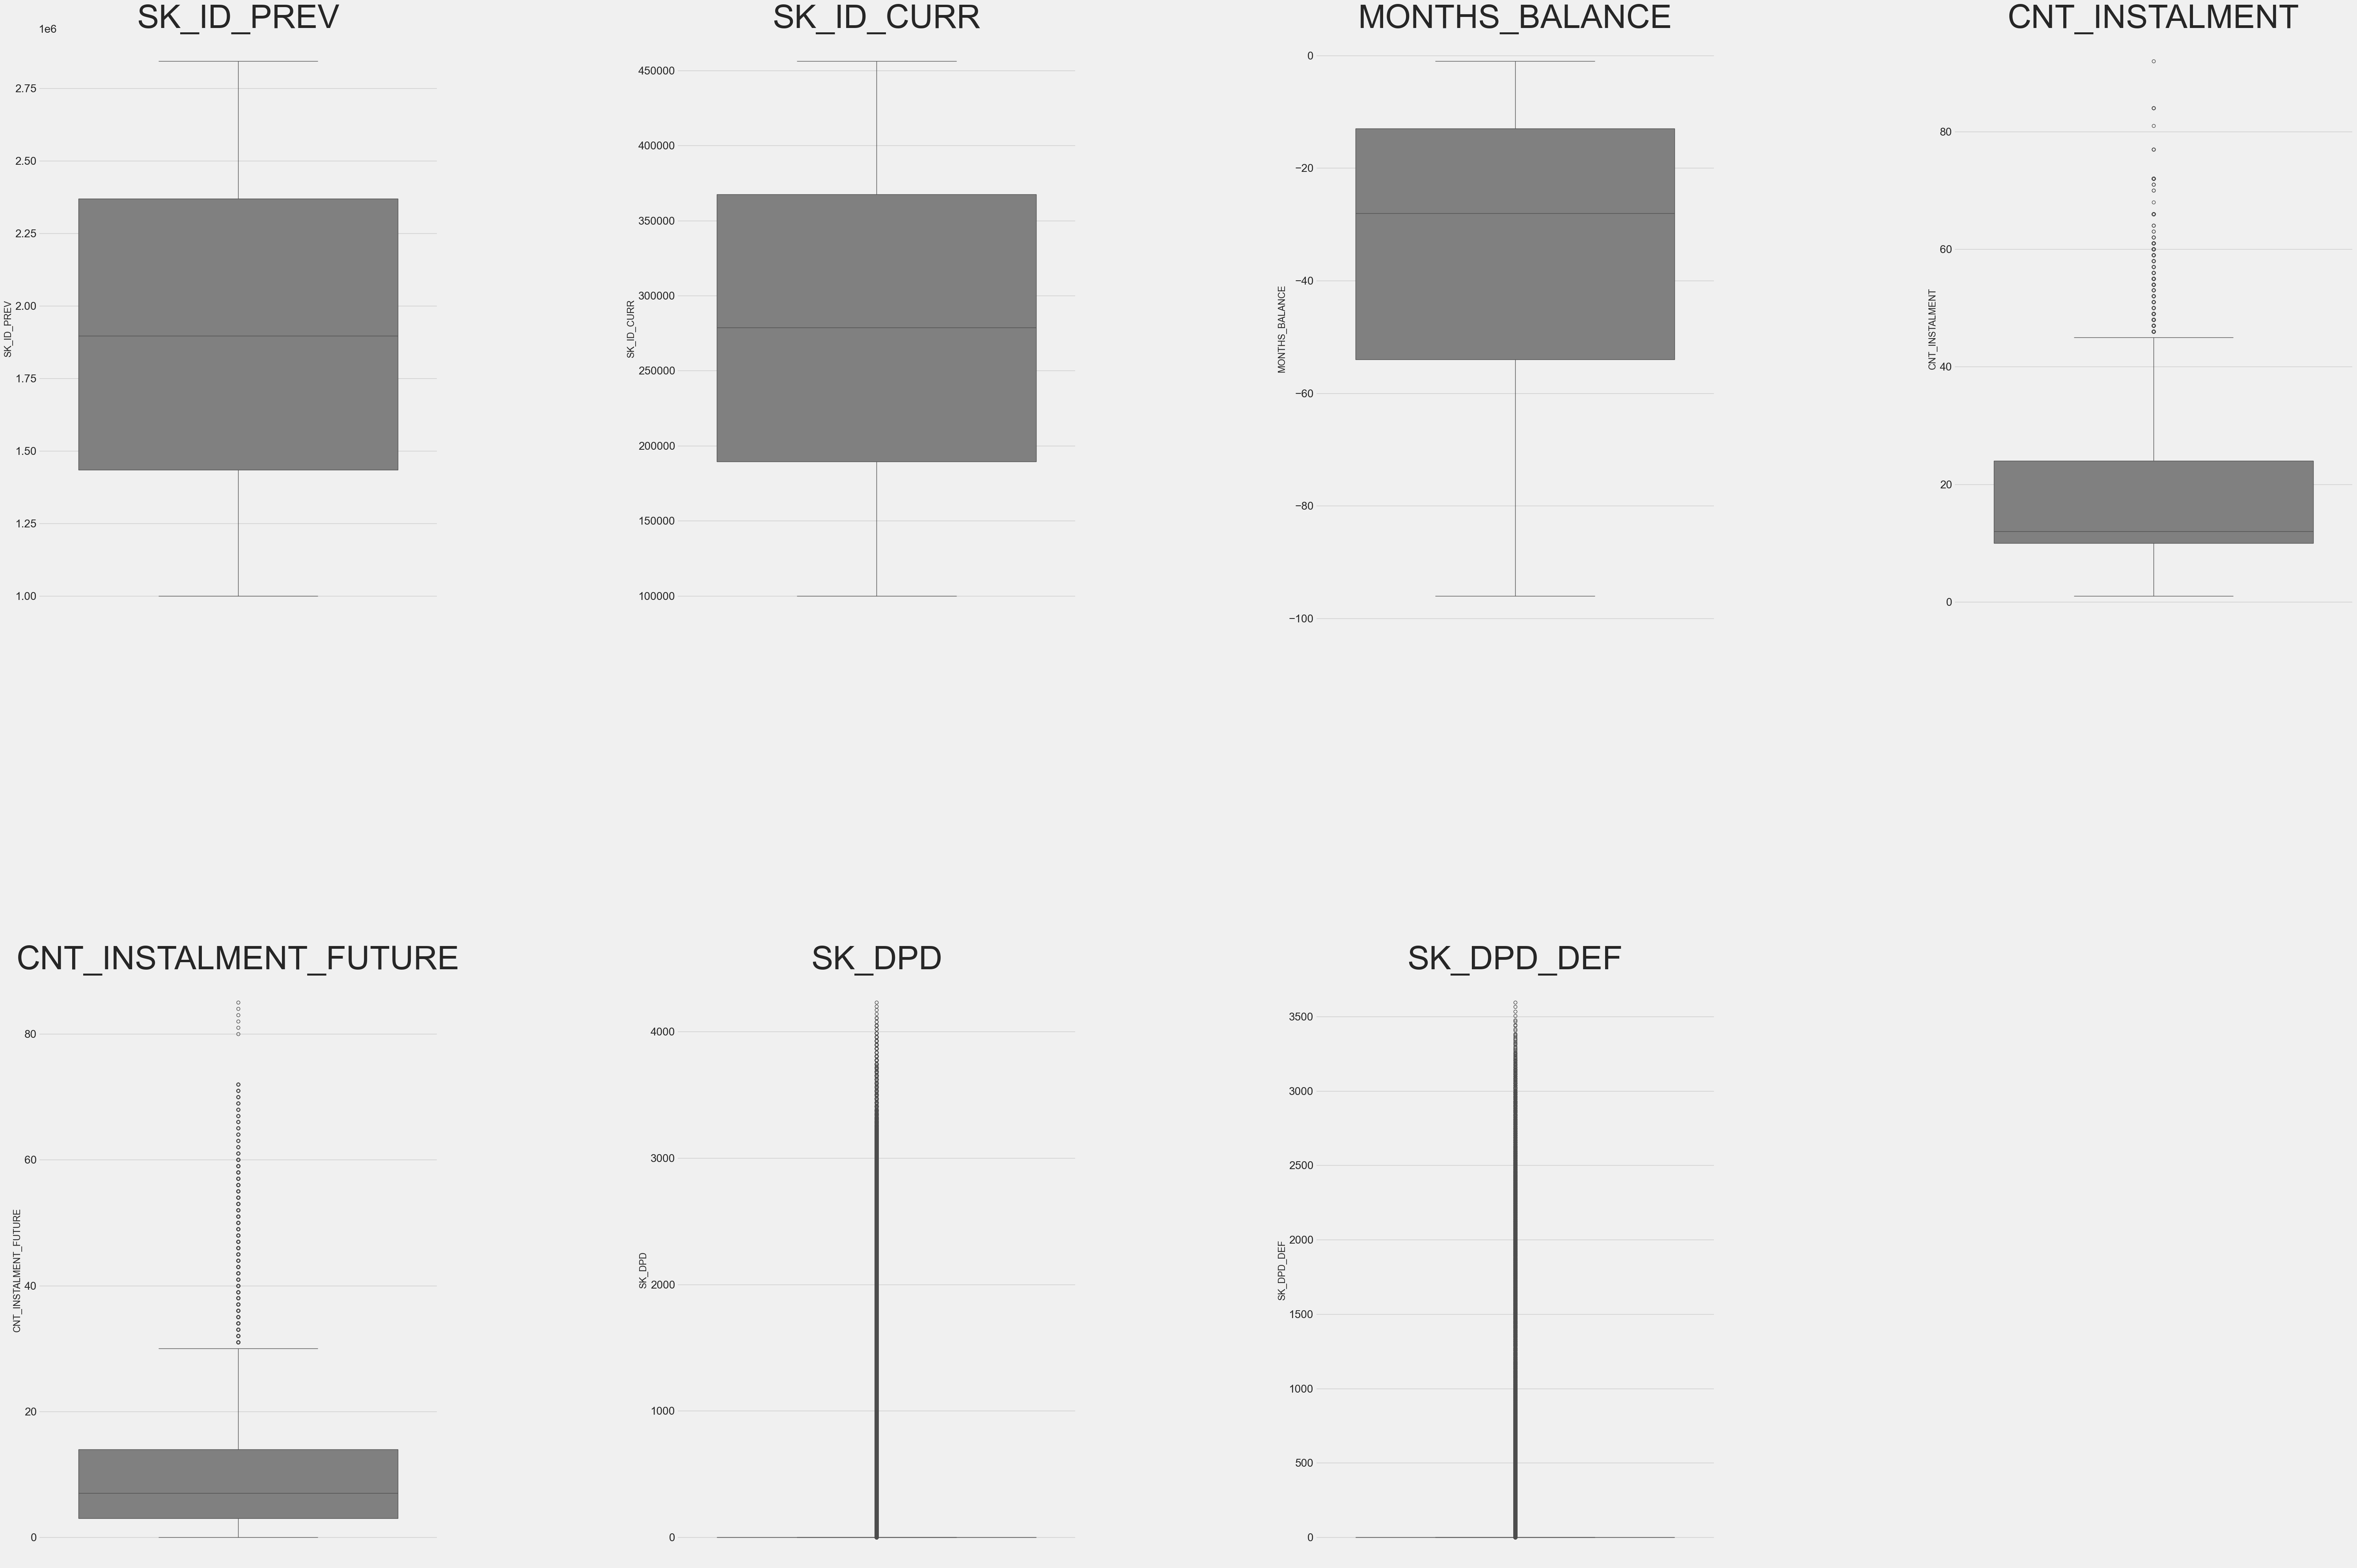

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran gambar lebih besar agar plot tidak terlalu padat
plt.figure(figsize=(60, 40))

for i in range(0, len(nums)):
    plt.subplot((len(nums) // 4) + 1, 4, i + 1)
    sns.boxplot(y=data[nums[i]], color='gray', orient='v')
    plt.title(nums[i], fontsize=60)
    plt.tight_layout()

plt.subplots_adjust(hspace=0.6, wspace=0.6)

plt.show()

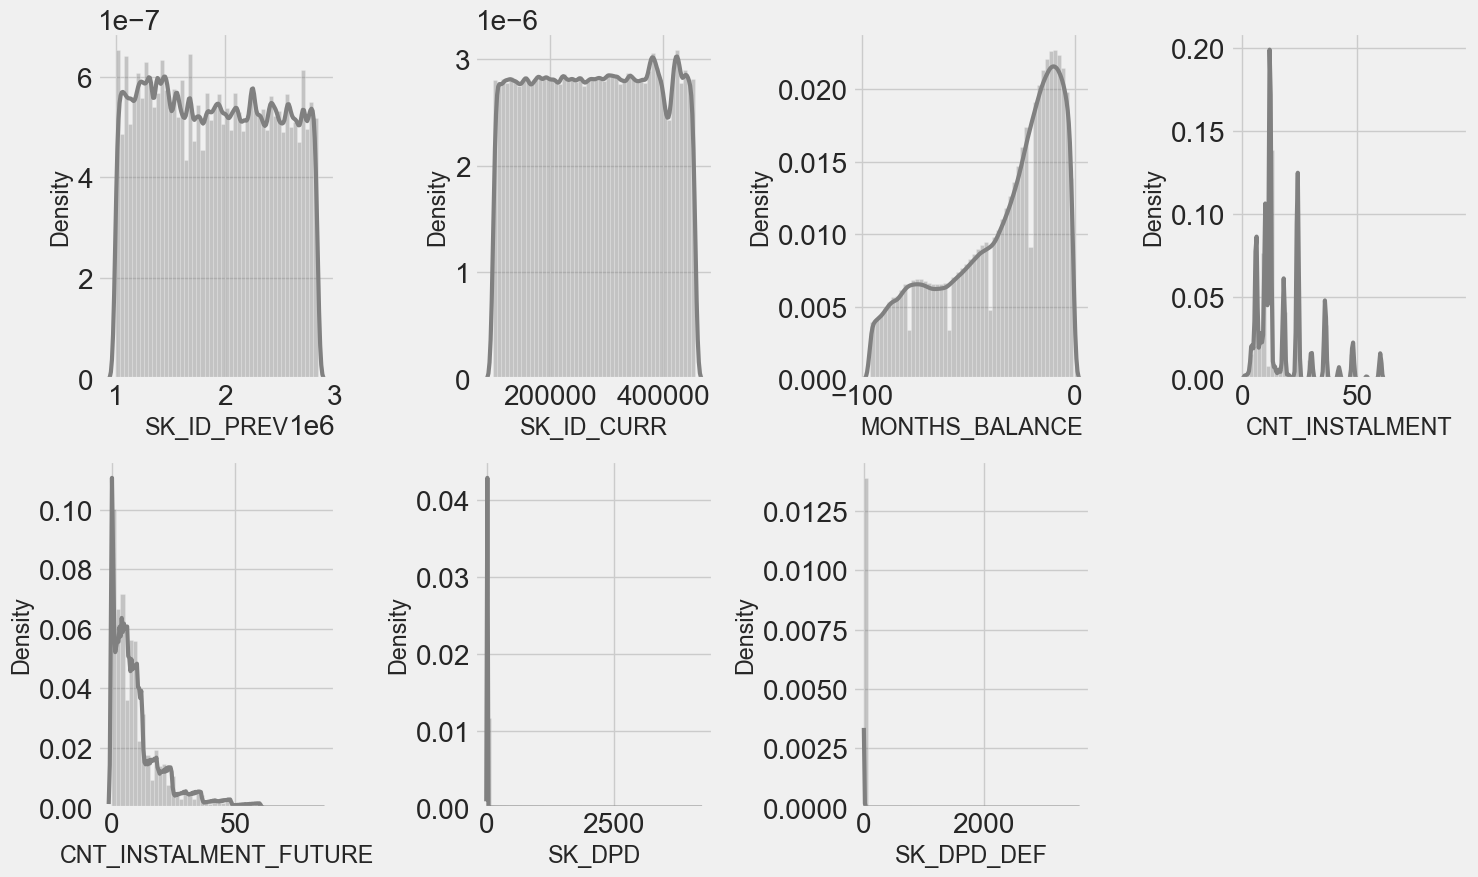

In [45]:
plt.figure(figsize=(15, 9))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.distplot(data[nums[i]], color='gray')
    plt.tight_layout()

## CNT_INSTALMENT
1. **Outlier**: Pada boxplot **CNT_INSTALMENT**, terlihat jelas beberapa outlier di atas garis whisker, dengan nilai mencapai hingga 80.
2. **Distribusi Miring**: Plot densitas menunjukkan distribusi yang miring ke kanan, artinya sebagian besar nilai berkumpul di angka rendah, sementara beberapa nilai yang lebih besar muncul di rentang yang lebih tinggi.
3. **Tindak Lanjut**: Pertimbangkan penanganan outlier (dapat dihapus atau ditransformasi) dan mungkin lakukan transformasi (seperti log atau square root) untuk mengurangi kemiringan distribusi.

## CNT_INSTALMENT_FUTURE:
1. **Outlier**: Sama dengan **CNT_INSTALMENT**, terdapat outlier pada kolom ini, terutama di nilai di atas 50.
2. **Kemiringan**: Distribusi juga miring ke kanan, dengan sebagian besar data berkumpul pada nilai yang lebih rendah.
3. **Tindak Lanjut**: Tangani outlier sesuai kebutuhan. Anda juga mungkin perlu mempertimbangkan transformasi untuk menormalkan distribusi.

## SK_DPD dan SK_DPD_DEF:
1. **Outlier Ekstrem**: Kedua variabel ini menunjukkan outlier ekstrem dengan nilai jauh di atas 2000 pada boxplot. Plot densitas juga menunjukkan sebagian besar nilai berada di bagian rendah, dekat 0, dengan sedikit nilai tinggi.
2. **Tindak Lanjut**: Pertimbangkan apakah outlier ekstrem ini valid. Berdasarkan pengetahuan domain, Anda dapat menetapkan batas maksimum untuk nilai ini atau menghapusnya jika dianggap sebagai kesalahan. Selain itu, normalisasi atau penskalaan mungkin diperlukan untuk analisis lebih lanjut.

## MONTHS_BALANCE:
1. **Distribusi Bimodal**: Plot densitas untuk **MONTHS_BALANCE** menunjukkan dua puncak, yang menunjukkan distribusi bimodal. Ini bisa berarti data berasal dari dua proses yang berbeda.
2. **Tindak Lanjut**: Investigasi lebih lanjut mengapa distribusi ini bimodal. Anda mungkin perlu mengeksplorasi apakah ada pembagian alami dalam data (misalnya berdasarkan jenis kontrak atau periode waktu) dan menangani kedua mode ini secara terpisah.

## SK_ID_PREV dan SK_ID_CURR:
1. **Distribusi Rata**: Kedua variabel ini menunjukkan distribusi hampir seragam atau datar pada plot densitas, sesuai dengan ekspektasi karena kolom ini adalah pengenal (identifier).
2. **Tindak Lanjut**: Kolom ini kemungkinan tidak memerlukan pra-pemrosesan untuk tujuan analisis data dan dapat diperlakukan sebagai pengenal unik.


In [47]:
value_counts = data[cats].value_counts()
print(value_counts)

NAME_CONTRACT_STATUS 
Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: count, dtype: int64


## Berdasarkan visualisasi density plot yang dihasilkan dari kode tersebut, berikut adalah analisis dari distribusi tiap kolom:




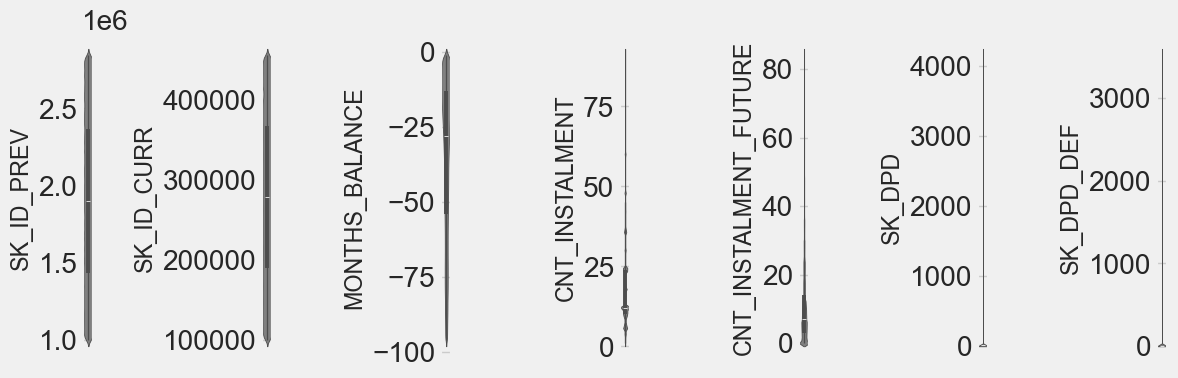

In [49]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()

## Berdasarkan violin plot yang ditampilkan pada gambar, berikut adalah analisis dari masing-masing kolom numerik:<br>

MONTHS_BALANCE: 
Distribusi pada MONTHS_BALANCE menunjukkan rentang dari 0 hingga sekitar -100, dengan puncak mendekati 0. Ini menunjukkan bahwa sebagian besar catatan berada dekat dengan tanggal aplikasi (0 bulan relatif terhadap aplikasi), sedangkan lebih sedikit catatan yang mencerminkan data yang lebih lama. Ini bisa mengindikasikan bahwa dataset lebih banyak mencakup data saldo terbaru, yang berarti data mengenai pembayaran atau keterlambatan lebih aktif dikelola ketika mendekati waktu aplikasi pinjaman.

CNT_INSTALMENT dan CNT_INSTALMENT_FUTURE: 
Distribusi pada CNT_INSTALMENT dan CNT_INSTALMENT_FUTURE terlihat sangat condong ke nilai yang lebih rendah, dengan sebagian besar data terkonsentrasi di bagian bawah (mendekati 0). Hal ini menunjukkan bahwa sebagian besar pinjaman dalam dataset ini memiliki jangka pendek atau mendekati akhir masa pelunasan angsuran. Ini bisa berarti bahwa banyak nasabah di Indonesia yang mengambil pinjaman berjangka pendek atau sedang berada di fase akhir pelunasan pinjamannya.

SK_DPD dan SK_DPD_DEF: 
Kedua kolom ini, SK_DPD (Hari Tertunggak) dan SK_DPD_DEF (Hari Tertunggak dengan toleransi), menunjukkan adanya outlier yang ekstrem, tetapi sebagian besar data terkonsentrasi mendekati 0. Ini menunjukkan bahwa sebagian besar nasabah membayar tepat waktu atau memiliki keterlambatan yang tidak signifikan. Namun, ada beberapa kasus di mana nasabah terlambat membayar hingga ribuan hari, yang bisa menjadi indikasi risiko gagal bayar yang sangat tinggi di kalangan nasabah tersebut.

Ringkasan:
1. Sebagian besar pinjaman memiliki sisa jangka waktu yang pendek atau mendekati selesai.
2. Mayoritas nasabah membayar tepat waktu, tetapi terdapat beberapa kasus ekstrem dengan keterlambatan pembayaran yang sangat tinggi (SK_DPD), yang mengindikasikan risiko gagal bayar tinggi.
3. Data terbaru (dekat 0 pada MONTHS_BALANCE) lebih dominan, yang menunjukkan bahwa data lebih terfokus pada pinjaman yang sedang berlangsung atau yang baru saja selesai.

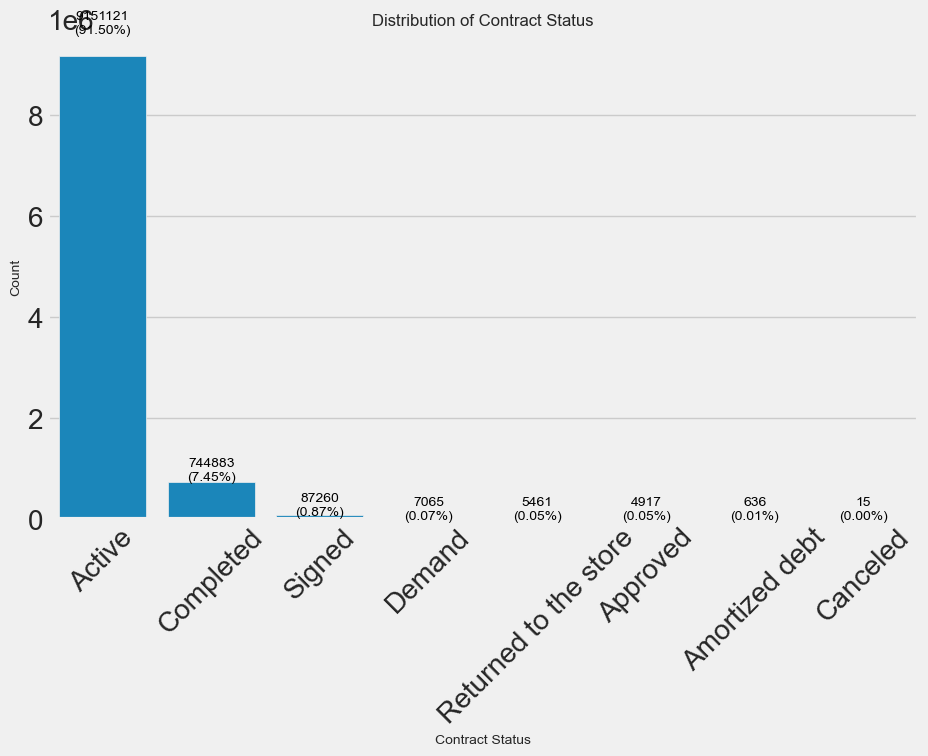

In [83]:
# Assuming value_counts has the counts for each category
value_counts = data['NAME_CONTRACT_STATUS'].value_counts()

# Calculate the percentage for each category
percentages = value_counts / value_counts.sum() * 100

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=value_counts.index, y=value_counts.values)

# Add labels and title
plt.xlabel('Contract Status', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Contract Status', fontsize=12)

# Rotate x-labels if necessary
plt.xticks(rotation=45)

# Annotate the bars with the count and percentage
for i, value in enumerate(value_counts):
    plt.text(i, value + 0.05 * value, f'{value}\n({percentages[i]:.2f}%)', 
             ha='center', fontsize=10, color='black')

plt.show()

Berdasarkan bar chart diatas bisa disimpulkan: 
1. Mayoritas kontrak berada dalam status Active, yang mewakili sekitar 91% dari total data.
2. Kontrak dengan status Completed juga mencakup bagian signifikan dari data.
3. Kategori seperti Signed, Demand, Returned to the store, dan Approved memiliki jumlah yang lebih sedikit.
4. Canceled dan XNA merupakan kategori yang paling jarang muncul, dan mungkin merupakan kasus outlier atau jarang terjadi.

### Multivariate Analysis (10 Poin)

In [88]:
data[nums].corr()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
SK_ID_PREV,1.000000,-0.000336,0.001835,0.003810,0.003671,-0.000487,0.004848
SK_ID_CURR,-0.000336,1.000000,0.000404,0.000161,-0.000546,0.003118,0.001948
MONTHS_BALANCE,0.001835,0.000404,1.000000,0.335102,0.270819,-0.018939,-0.000381
CNT_INSTALMENT,0.003810,0.000161,0.335102,1.000000,0.871297,-0.060691,-0.014128
CNT_INSTALMENT_FUTURE,0.003671,-0.000546,0.270819,0.871297,1.000000,-0.081921,-0.017417
SK_DPD,-0.000487,0.003118,-0.018939,-0.060691,-0.081921,1.000000,0.245782
SK_DPD_DEF,0.004848,0.001948,-0.000381,-0.014128,-0.017417,0.245782,1.000000


<Axes: >

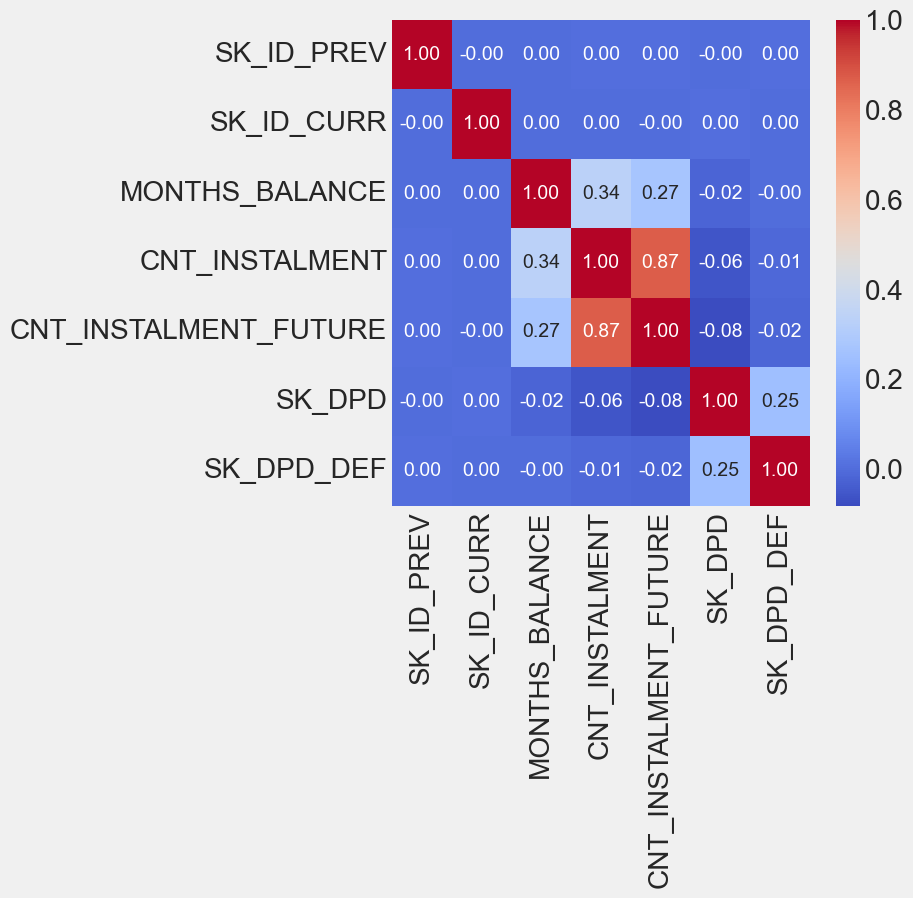

In [86]:
plt.figure(figsize=(6, 6))
sns.heatmap(data[nums].corr(), cmap='coolwarm', annot=True, fmt='.2f')

# 3A Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
## Korelasi yang Signifikan:<br>
1. CNT_INSTALMENT dan CNT_INSTALMENT_FUTURE memiliki korelasi positif yang sangat tinggi (0,87), yang menunjukkan bahwa kedua variabel ini sangat terkait. Hal ini wajar karena keduanya tampaknya mewakili jumlah cicilan—saat ini dan masa depan—yang secara alami akan berkaitan.<br>

2. MONTHS_BALANCE dan CNT_INSTALMENT juga memiliki korelasi positif sedang (0,34), yang mungkin menunjukkan bahwa seiring bertambahnya saldo bulan, jumlah cicilan juga meningkat.<br>

## Fitur dengan Korelasi Rendah:<br>

Sebagian besar variabel lain, seperti SK_ID_PREV, SK_ID_CURR, SK_DPD, dan SK_DPD_DEF, menunjukkan korelasi yang sangat rendah atau hampir nol dengan variabel lain. Contohnya:<br>
1. SK_DPD (Hari Tunggakan) memiliki korelasi rendah dengan semua variabel lain, dengan korelasi tertinggi adalah dengan SK_DPD_DEF (0,25). Ini masuk akal karena keduanya mungkin terkait dengan pembayaran yang terlambat.<br>
2. SK_ID_PREV dan SK_ID_CURR tidak memiliki korelasi satu sama lain maupun dengan fitur lain dalam dataset ini, menunjukkan bahwa ID ini berfungsi sebagai pengenal unik tanpa hubungan statistik yang signifikan dengan fitur numerik lainnya.<br>


## Kesimpulan:<br>
1. Korelasi terkuat terdapat antara CNT_INSTALMENT dan CNT_INSTALMENT_FUTURE, yang masuk akal mengingat makna dari variabel-variabel tersebut.
2. Fitur-fitur lain, terutama bidang ID dan SK_DPD (Hari Tunggakan), menunjukkan korelasi yang sangat lemah atau tidak ada dengan sebagian besar fitur lainnya.
3. Fitur-fitur sudah relevan dan masih perlu dipertahankan karena tidak ditemukan sifat korelasi yang bersifat redundant.




# 3B Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
<br>
Dari heatmap korelasi yang telah disediakan, berikut adalah analisis lebih lanjut mengenai korelasi antar-feature dan tindakan yang mungkin perlu diambil terhadap fitur-fitur tersebut.<br>

## Pola yang Menarik di Korelasi Antar-Feature:<br>
CNT_INSTALMENT dan CNT_INSTALMENT_FUTURE memiliki korelasi positif yang sangat tinggi (0,87), yang menunjukkan bahwa kedua variabel ini sangat terkait. Kedua variabel ini dinilai akan berguna untuk model yang akan dikembangkan.

MONTHS_BALANCE dan CNT_INSTALMENT juga memiliki korelasi positif sedang (0,34)Kedua variabel ini juga dinilai akan berguna untuk model yang akan dikembangkan.t.

# Kesimpulan Tindakan untuk Antar-Fitur:<br>
**Pertahankan:**<brCNT_INSTALMENT dan CNT_INSTALMENT_FUTURENT karena meskipun korelasinya tinggi, keduanya penting dalam konteks bisnis dan analisis keuangan.<brMONTHS_BALANCE dan CNT_INSTALMENT juga memiliki korelasi positif sedangah, namun keduanya memberikan informasi diskrit yang relevan.<br>

# Data Preparation

## Missing Value (5 Poin)

In [53]:
data.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [51]:
list_item = []
for col in data.columns:
    unique_values = data[col].unique()[:4]  # Extract the first 4 unique values
    list_item.append([col, data[col].dtype, data[col].isna().sum(), 100*data[col].isna().sum()/len(data[col]), data[col].nunique(), unique_values])

# Create a DataFrame from the list
desc_data = pd.DataFrame(data=list_item, columns=['feature', 'data_type', 'null_num', 'null_persen', 'unique_num', 'unique_sample'])

# Display the resulting DataFrame
desc_data

,feature,data_type,null_num,null_persen,unique_num,unique_sample
0,SK_ID_PREV,int64,0,0.000000,936325,"[1803195, 1715348, 1784872, 1903291]"
1,SK_ID_CURR,int64,0,0.000000,337252,"[182943, 367990, 397406, 269225]"
2,MONTHS_BALANCE,int64,0,0.000000,96,"[-31, -33, -32, -35]"
3,CNT_INSTALMENT,float64,26071,0.260675,73,"[48.0, 36.0, 12.0, 24.0]"
4,CNT_INSTALMENT_FUTURE,float64,26087,0.260835,79,"[45.0, 35.0, 9.0, 42.0]"
5,NAME_CONTRACT_STATUS,object,0,0.000000,9,"[Active, Completed, Signed, Approved]"
6,SK_DPD,int64,0,0.000000,3400,"[0, 1, 2, 4]"
7,SK_DPD_DEF,int64,0,0.000000,2307,"[0, 1, 2, 4]"


In [55]:
# Fill missing values
#Karena kedua file memiliki distribusi right-skewed, sehingga pengisian missing valuenya menggunakan median.

data['CNT_INSTALMENT'].fillna(data['CNT_INSTALMENT'].median(), inplace=True)
data['CNT_INSTALMENT_FUTURE'].fillna(data['CNT_INSTALMENT_FUTURE'].median(), inplace=True)

# Check if there are any missing values remaining
print(data.isnull().sum())

SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
SK_DPD                   0
SK_DPD_DEF               0
dtype: int64


Isi null dengan 0 mengasumsikan tidak ada keterlambatan pembayaran (hari ke-0 atau pembayaran tepat waktu).

In [59]:
# Replace 'XNA' with the mode ('Active' in this case)
data['NAME_CONTRACT_STATUS'].replace('XNA', 'Active', inplace=True)

# Check if there are any missing values remaining
print(data.isnull().sum())


SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
SK_DPD                   0
SK_DPD_DEF               0
dtype: int64


## Duplicate Values


In [61]:
# cek jumlah duplicated rows
# dari semua kolom
data.duplicated().sum()

0

## Outliers

In [63]:
import numpy as np
from scipy import stats

# Tentukan threshold Z-Score (misalnya, 3)
threshold = 3

# Print jumlah baris sebelum memfilter outlier
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

# Inisialisasi array untuk memfilter entri
filtered_entries = np.array([True] * len(data))

# Kolom numerik yang akan digunakan untuk memfilter outlier
nums = ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']

# Loop untuk menghitung Z-Score dan memfilter
for col in nums:
    zscore = abs(stats.zscore(data[col]))
    print(f'Max Z-Score for {col}: {zscore.max()}')  # Cek Z-Score maksimum untuk referensi

    # Filter menggunakan threshold yang bisa disesuaikan
    filtered_entries = (zscore < threshold) & filtered_entries

# Simpan data yang sudah difilter
data_filtered = data[filtered_entries]

# Print jumlah baris setelah memfilter outlier
print(f'Jumlah baris setelah memfilter outlier: {len(data_filtered)}')


Jumlah baris sebelum memfilter outlier: 10001358
Max Z-Score for MONTHS_BALANCE: 2.3396793338837303
Max Z-Score for CNT_INSTALMENT: 6.252898462838812
Max Z-Score for CNT_INSTALMENT_FUTURE: 6.716417143683004
Max Z-Score for SK_DPD: 31.793118283532575
Max Z-Score for SK_DPD_DEF: 109.70917203155253
Jumlah baris setelah memfilter outlier: 9607018


**Sebelum Pemfilteran**:
Jumlah baris sebelum memfilter outlier: 10.001.358

**Z-Score Maksimum per Kolom**:
**MONTHS_BALANCE**: Z-Score maksimum sebesar 2.34
Deskripsi: Bulan saldo relatif terhadap tanggal aplikasi. Nilai -1 berarti informasi dari snapshot bulanan terbaru, 0 berarti informasi pada saat aplikasi. Biasanya akan sama dengan -1 karena banyak bank tidak secara teratur memperbarui informasi ke Credit Bureau.
Interpretasi Z-Score: Z-Score yang relatif rendah menunjukkan tidak ada banyak outlier ekstrem dalam kolom ini. Sebagian besar data mengenai bulan saldo berkumpul dalam rentang yang diharapkan.

**CNT_INSTALMENT**: Z-Score maksimum sebesar 6.25
Deskripsi: Jumlah angsuran kredit sebelumnya, yang dapat berubah seiring waktu.
Interpretasi Z-Score: Terdapat beberapa outlier di kolom ini. Beberapa nilai lebih dari 6 standar deviasi dari rata-rata, yang menunjukkan adanya variasi yang signifikan dalam jumlah angsuran, dengan beberapa data yang sangat jauh dari nilai rata-rata.

**CNT_INSTALMENT_FUTURE**: Z-Score maksimum sebesar 6.72
Deskripsi: Angsuran yang tersisa untuk dibayar pada kredit sebelumnya.
Interpretasi Z-Score: Sama halnya dengan CNT_INSTALMENT, kolom ini juga memiliki beberapa outlier yang cukup jauh dari rata-rata, dengan Z-Score lebih dari 6. Ini menunjukkan bahwa ada beberapa catatan dengan angsuran tersisa yang sangat tinggi.

**SK_DPD**: Z-Score maksimum sebesar 31.79
Deskripsi: Days Past Due (DPD) selama bulan kredit sebelumnya.
Interpretasi Z-Score: Kolom ini memiliki outlier yang sangat ekstrem, menunjukkan adanya beberapa keterlambatan pembayaran yang sangat jauh lebih tinggi daripada kebanyakan data lainnya. Nilai Z-Score ini menunjukkan penyimpangan besar dalam keterlambatan pembayaran.

**SK_DPD_DEF**: Z-Score maksimum sebesar 109.71
Deskripsi: Days Past Due (DPD) selama bulan dengan toleransi (hutang dengan jumlah pinjaman rendah diabaikan).
Interpretasi Z-Score: Ini adalah kolom dengan outlier paling ekstrem. Z-Score yang sangat tinggi, lebih dari 100, menunjukkan ada beberapa data yang jauh dari data lainnya, terkait keterlambatan pembayaran yang signifikan. Nilai ini mungkin berkaitan dengan pinjaman yang gagal dibayar dalam jumlah besar.

**Setelah Pemfilteran**:
Jumlah baris setelah memfilter outlier: 9.607.018
Sebanyak 394.340 baris atau sekitar 3.94% dari total data dihapus setelah pemfilteran outlier menggunakan threshold Z-Score yang diterapkan.

**Kesimpulan**:
Setelah melakukan pemfilteran, sekitar 3.94% dari data dianggap sebagai outlier dan dihapus.
Kolom SK_DPD dan SK_DPD_DEF berkontribusi besar terhadap outlier dengan Z-Score yang sangat tinggi, menunjukkan adanya sejumlah kecil data yang jauh dari rata-rata, terutama dalam hal keterlambatan pembayaran.
Kolom CNT_INSTALMENT dan CNT_INSTALMENT_FUTURE juga memiliki beberapa outlier, namun mereka cenderung berada pada tingkat moderat dibandingkan dengan kolom SK_DPD.
Kolom MONTHS_BALANCE relatif bebas dari outlier ekstrem, dengan nilai Z-Score maksimum yang lebih rendah dibandingkan kolom lainnya.

In [90]:
data_filtered.to_csv('POS_CASH_balance_filtered.csv', index=False)

## Business Insight
Dengan melihat pola data secara keluruhan, didapatkan business insight sebagai berikut:
1. Pola Aktivitas Kontrak: <br> 
Kolom NAME_CONTRACT_STATUS menunjukkan status kontrak, seperti "Active." Dengan menganalisis data ini, bisnis dapat mengidentifikasi pola aktivitas kontrak dari waktu ke waktu, seperti jumlah kontrak yang aktif, ditutup, atau dibatalkan. Pemahaman ini dapat membantu perusahaan memprediksi arus kas di masa depan berdasarkan status kontrak serta mengelola hubungan dengan nasabah dengan lebih efektif.

2. Manajemen Hutang & Risiko Kredit: <br>
Kolom SK_DPD dan SK_DPD_DEF mencatat jumlah hari keterlambatan pembayaran, baik dengan maupun tanpa toleransi. Dengan menganalisis data ini, perusahaan dapat memahami perilaku pembayaran nasabah dan menilai risiko kredit. Nilai DPD yang tinggi dapat menandakan potensi gagal bayar, sehingga perusahaan dapat mengambil tindakan preventif, seperti memberikan perpanjangan pembayaran atau merestrukturisasi hutang.

3. Tren Angsuran Pinjaman: <br>
Kolom CNT_INSTALMENT dan CNT_INSTALMENT_FUTURE menunjukkan jumlah angsuran yang harus dibayar dan sisa angsuran. Analisis data ini membantu perusahaan melacak perkembangan pembayaran nasabah dan mengidentifikasi potensi masalah dalam pelunasan. Nasabah yang masih memiliki banyak angsuran tersisa dengan nilai DPD yang tinggi dapat dianggap berisiko tinggi, sehingga perusahaan bisa memberi perhatian lebih untuk mengurangi risiko gagal bayar.

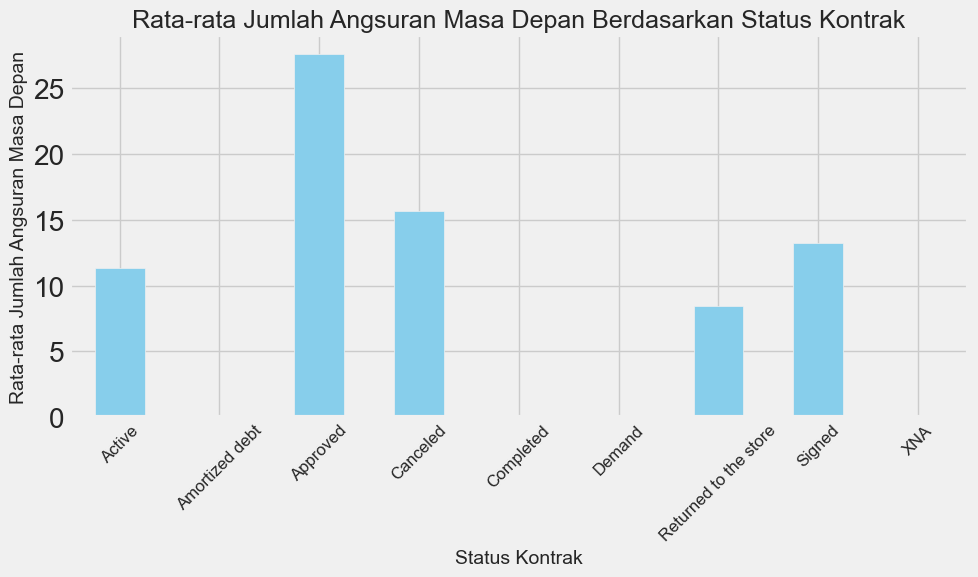

In [35]:
# Menghitung rata-rata jumlah angsuran masa depan berdasarkan status kontrak
avg_instalment_future = data.groupby('NAME_CONTRACT_STATUS')['CNT_INSTALMENT_FUTURE'].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_instalment_future.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Rata-rata Jumlah Angsuran Masa Depan Berdasarkan Status Kontrak', fontsize=18)
plt.xlabel('Status Kontrak', fontsize=14)
plt.ylabel('Rata-rata Jumlah Angsuran Masa Depan', fontsize=14)

# Customizing the x-ticks
plt.xticks(rotation=45, fontsize=12, ha='center')

# Using tight layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

Berdasarkan grafik yang menunjukkan rata-rata jumlah angsuran masa depan berdasarkan status kontrak, didapatkan business insight sebagai berikut:
1. Nasabah dengan kontrak Approved dan Signed cenderung memiliki jangka waktu pembayaran yang lebih panjang, hal itu menunjukkan preferensi terhadap pinjaman jangka panjang.
2. Kontrak Active mencerminkan pembayaran yang sedang berjalan, dengan nasabah melunasi angsuran mereka secara stabil.
3. Kontrak Returned to the Store menunjukkan penghentian pinjaman lebih awal, kemungkinan terkait dengan pengembalian produk, yang mungkin memerlukan evaluasi ulang terkait produk atau kebijakan pengembalian.

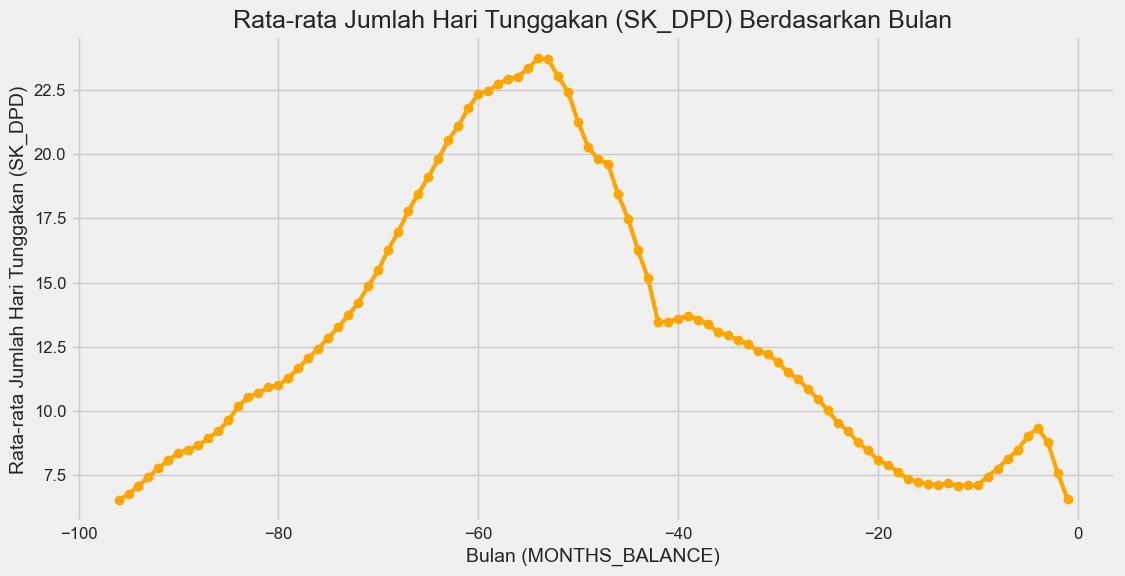

In [31]:
# Menghitung rata-rata tunggakan (SK_DPD) berdasarkan bulan
avg_dpd_per_month = data.groupby('MONTHS_BALANCE')['SK_DPD'].mean()

# Plotting
plt.figure(figsize=(12, 6))
avg_dpd_per_month.plot(kind='line', marker='o', color='orange')
plt.title('Rata-rata Jumlah Hari Tunggakan (SK_DPD) Berdasarkan Bulan', fontsize=18)
plt.xlabel('Bulan (MONTHS_BALANCE)', fontsize=14)
plt.ylabel('Rata-rata Jumlah Hari Tunggakan (SK_DPD)', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Berdasarkan grafik yang menampilkan rata-rata jumlah hari tunggakan (SK_DPD) berdasarkan bulan (MONTHS_BALANCE), berikut business insight yang bisa diambil:
1. Ada peningkatan risiko keterlambatan pembayaran pada awal dan pertengahan periode pinjaman.
2. Perusahaan perlu memperhatikan nasabah sekitar bulan -50, di mana risiko keterlambatan pembayaran paling tinggi.
3. Intervensi yang tepat setelah puncak tunggakan dapat membantu menurunkan risiko gagal bayar di masa berikutnya.
4. Mendekati akhir masa pinjaman, nasabah cenderung lebih disiplin dalam melakukan pembayaran.
Lonjakan kecil di akhir periode dapat diatasi dengan strategi restrukturisasi atau bantuan pembayaran agar nasabah dapat menyelesaikan kewajiban mereka.